In [1]:
%matplotlib widget

In [2]:
%cd ..

d:\Users\NitroPC\Documents\Python\ConcursoModelizacion2023


In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from gradient_descent import Environment, Agent, ConstrainedLoss, CostLoss, DistanceLoss
from utils import plot_location

In [4]:
def optimize(env, agent, loss, loss2, optim, scheduler=None, iters=10000, verbose=True):
    losses_1, losses_2 = [], []
    params = []
    
    for i in range(iters):
        f = agent()
        p, v = env(f)
        l = loss(f, p, v)

        optim.zero_grad()
        l.backward(retain_graph=True)

        torch.nn.utils.clip_grad_norm_(agent.parameters(), 10.)
        optim.step()

        if scheduler is not None:
            scheduler.step()

        if verbose and i%10==0:
            l1 = l.item()
            losses_1 += [l1]
            losses_2 += [loss2(f, p, v).item()]
            param = f.detach().numpy()
            params += [param]

            print(l1, scheduler.get_last_lr())
            
    return losses_1, losses_2, params

In [5]:
K=35
dt = 1.
g = 0.1
m = 10.
F_max = 11.
p_0 = np.array([50., 50., 100.])
v_0 = np.array([-10., 0., -10.])
alpha = 0.5
gamma = 1.

In [20]:
agent = Agent(K)
env = Environment(dt, gamma, g, m, p_0, v_0)

In [21]:
loss = ConstrainedLoss(dt, gamma, F_max, alpha)
loss2 = CostLoss(dt, gamma)
optim = torch.optim.RMSprop(agent.parameters(), lr=1e-0)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optim, gamma=0.99)

In [22]:
losses_1, losses_2, params = optimize(env, agent, loss, loss2, optim, scheduler, iters=1000)

194631.859375 [0.99]
1439.7008056640625 [0.8953382542587163]


In [9]:
f = agent()
p, v = env(f)

In [10]:
loss(f, p, v)

tensor(179.5231, grad_fn=<AddBackward0>)

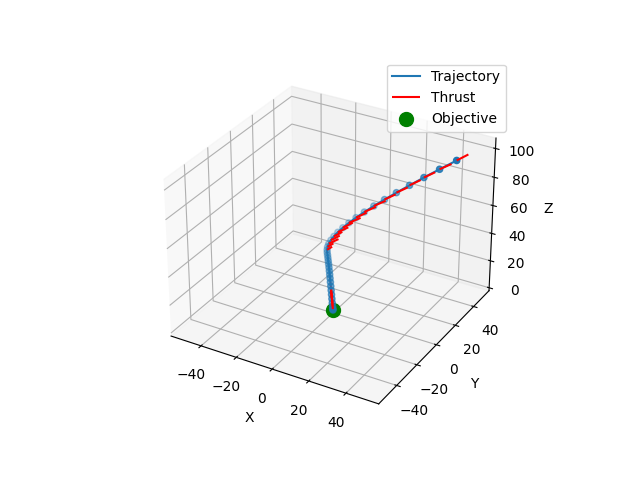

In [11]:
plot_location(f, p, v, lambd=1.)

In [12]:
d_loss = DistanceLoss()
c_loss = CostLoss(dt, gamma)

In [13]:
print(d_loss(f, p, v))
print(c_loss(f, p, v))

(tensor(0.0032, grad_fn=<LinalgVectorNormBackward0>), tensor(0.0003, grad_fn=<LinalgVectorNormBackward0>))
tensor(179.4483, grad_fn=<MulBackward0>)


In [14]:
#import scienceplots
#plt.style.use('science')

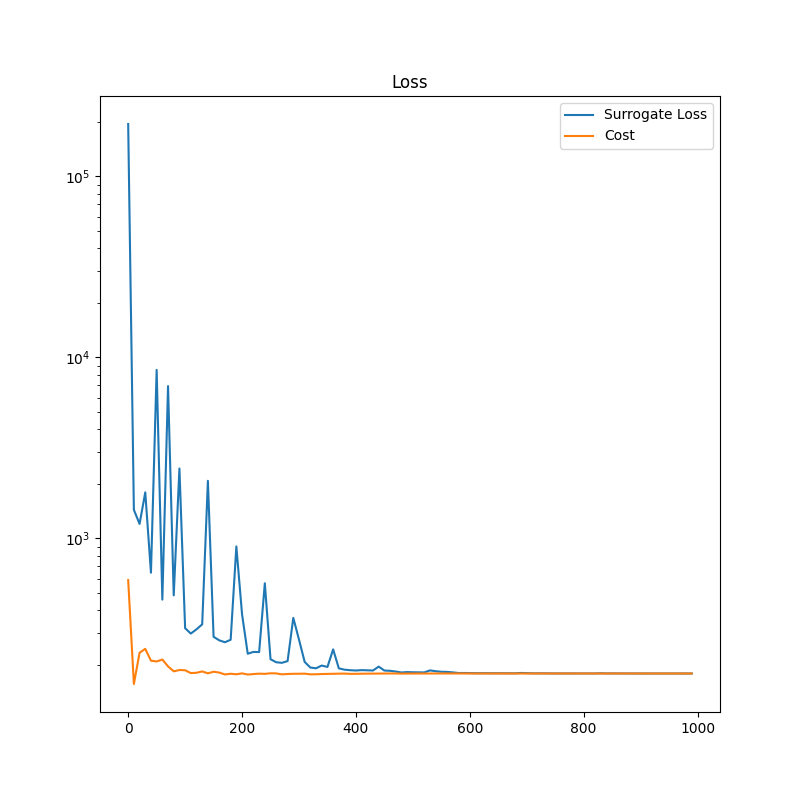

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(np.arange(0,1000,10), losses_1, label='Surrogate Loss')
ax.plot(np.arange(0,1000,10), losses_2, label='Cost')
ax.set_title('Loss')
ax.set_yscale('log')

ax.legend()
plt.savefig("images/loss_v2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [16]:
params_np = np.array(params)

In [17]:
params_np.shape

(100, 35, 3)

In [18]:
params_np[:10,0,0]

array([7.2623796, 7.2623796, 7.2623796, 7.2623796, 7.2623796, 7.2623796,
       7.2623796, 7.2623796, 7.2623796, 7.2623796], dtype=float32)

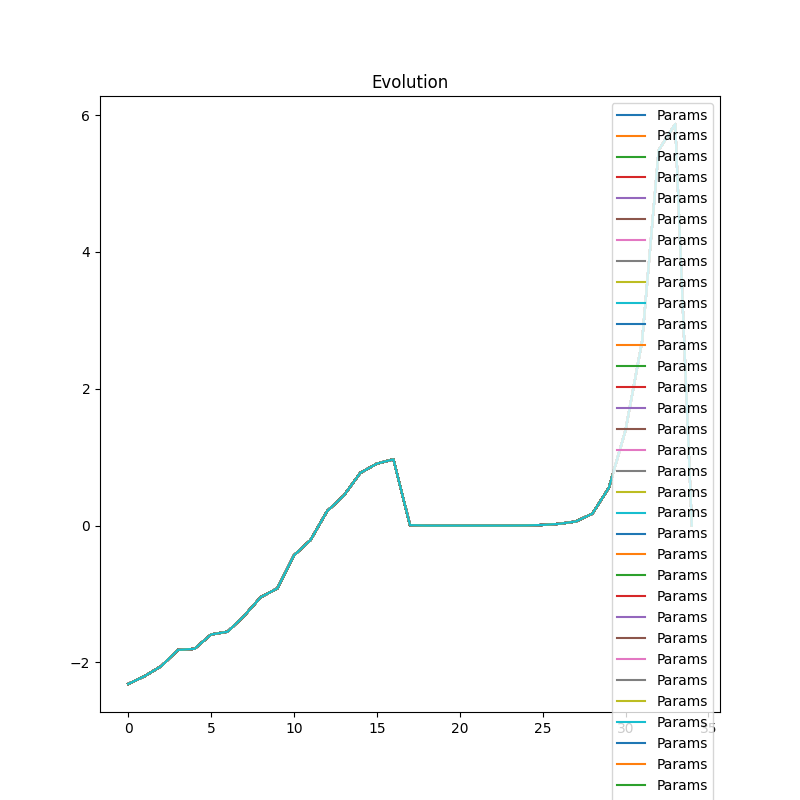

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(params_np[:,:,1].transpose((1,0)), label='Params')
ax.set_title('Evolution')

ax.legend()
plt.savefig("images/loss_v3.pdf", format="pdf", bbox_inches="tight")
plt.show()